**линейный классификатор**

правило Хэбба

Евгений Борисов borisov.e@solarl.ru

In [1]:
import numpy as np
from numpy import random  as rng
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

n_samples = 500
n_clst = 2 # количество классов

X,target = make_blobs( 
        n_samples=n_samples,
        centers=n_clst,  
        cluster_std=[1.5, 1.5,]
    )

# выход модели {-1,+1}
y = target*2-1

# нормируем данные
# from sklearn.preprocessing import MinMaxScaler
# X = MinMaxScaler([-1.0,1.0]).fit_transform(X)
from sklearn.preprocessing   import StandardScaler
X = StandardScaler().fit(X).transform(X)

X.shape, y.shape

((500, 2), (500,))

In [3]:
# докидываем свободный член
X = np.hstack([X,np.ones([X.shape[0],1])])
X.shape

(500, 3)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((100, 3), (100,), (400, 3), (400,))

In [5]:
del X
del y

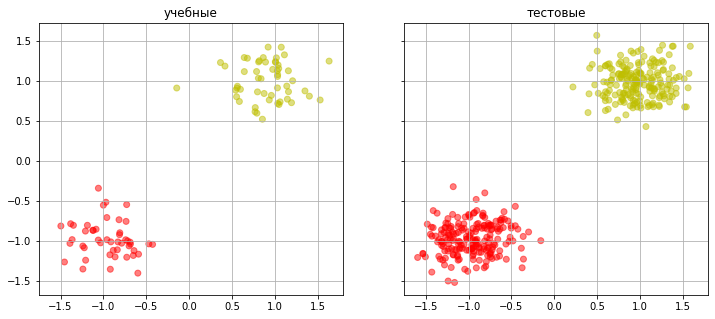

In [6]:
def plot_data(ax,X,y,t):
    c = [ ['b','r','g','y'][j] for j in y  ]
    ax.set_title(t)
    ax.scatter( x=X[:,0], y=X[:,1], c=c,  alpha=0.5 )
    ax.grid()

fig, (ax0,ax1) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(12,5),)
plot_data(ax0,X_train,y_train,'учебные')    
plot_data(ax1,X_test,y_test,'тестовые')    
plt.show()

$$a(x,w) = sign\left(\sum\limits_{i=1} x_i \cdot w_i + w_0\right)$$

In [7]:
MAX_ITER = 3 # максимальное число циклов обучения

# порог ошибки (количество ошибок)
ACC_BOUND = .95

lr = .5 # скорость обучения
l = .5 # темп "забывания"

loss_history = [] # история ошибки

In [8]:
# инициализация параметров
W = rng.normal(loc=0., scale=.1, size=X_train.shape[1])
W 

array([-0.02513735,  0.04536082,  0.01466658])

In [9]:
# метод стохастического градиентного спуска (SGD)
stop=False
for i in range(MAX_ITER):

    if stop: break

    for j in np.random.permutation(X_train.shape[0]):
        
        if er_hist[-1] > ACC_BOUND: # проверяем достижение порога
            print( 'acc bound on epoch %i step %i: %f'%(i,j,er_hist[-1]) )
            stop=True
            break
            
        xj,yj = X_train[j,:],y_train[j]
                        
        r = np.sign( xj.dot(W) ) # выход
        
        if (r*yj)<0: 
            W = W + a*xj.T.dot(y_train[j])
        
        # значение ф-ции потери
        qj = loss(xj,W,yj)
        q = l*qj +(1-l)*q
        
        acc_hist.append( accuracy( np.sign(X_train.dot(W)),y_train ))
        


NameError: name 'er_hist' is not defined

In [ ]:
print(W)
print(len(er_hist),er_hist[-1])

In [ ]:
plt.plot(range(len(er_hist)),er_hist)
plt.grid()
plt.show()

---

In [ ]:
r = np.sign(X_test.dot(W)) 
accuracy( r,y_test )

In [ ]:
f, axarr = plt.subplots(1,2, sharey=True, sharex=True, figsize=(11,6),)
    
axarr[0].set_title('тест')
axarr[0].scatter( x=X_test[:,1], 
                  y=X_test[:,2], 
                  c=[ ['b','r','g','y'][int(j>0)] for j in y_test],
                  s=10,
                  alpha=0.5 )
axarr[0].grid()

axarr[1].set_title('результат')
axarr[1].scatter( x=X_test[:,1], 
                  y=X_test[:,2], 
                  c=[['b','r','g','y'][int(j>0)] for j in r ],  
                  s=10,
                  alpha=0.5 )
axarr[1].grid()


plt.show()